### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing,metrics
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
# import/reading the csv
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# having look at the fraud dataset
df[df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [4]:
# getting info of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Here all feature are with float64 dtype and target feature is of int64, also seems like there are no null values.

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


C:\Users\Viren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


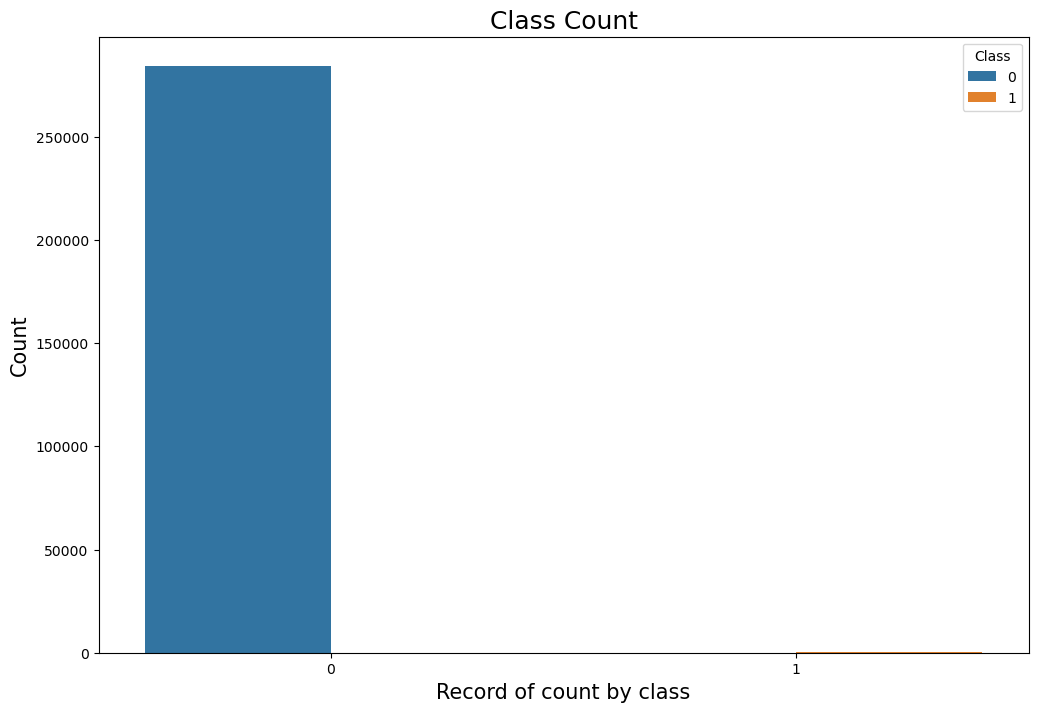

In [8]:
# create a countplot for number of fraud and non-fraud transactions

plt.figure(figsize=(12,8))
sns.countplot(df['Class'],hue = df['Class'])
plt.title('Class Count',fontsize = 18)
plt.xlabel('Record of count by class',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [9]:
# Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In [10]:
# Checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


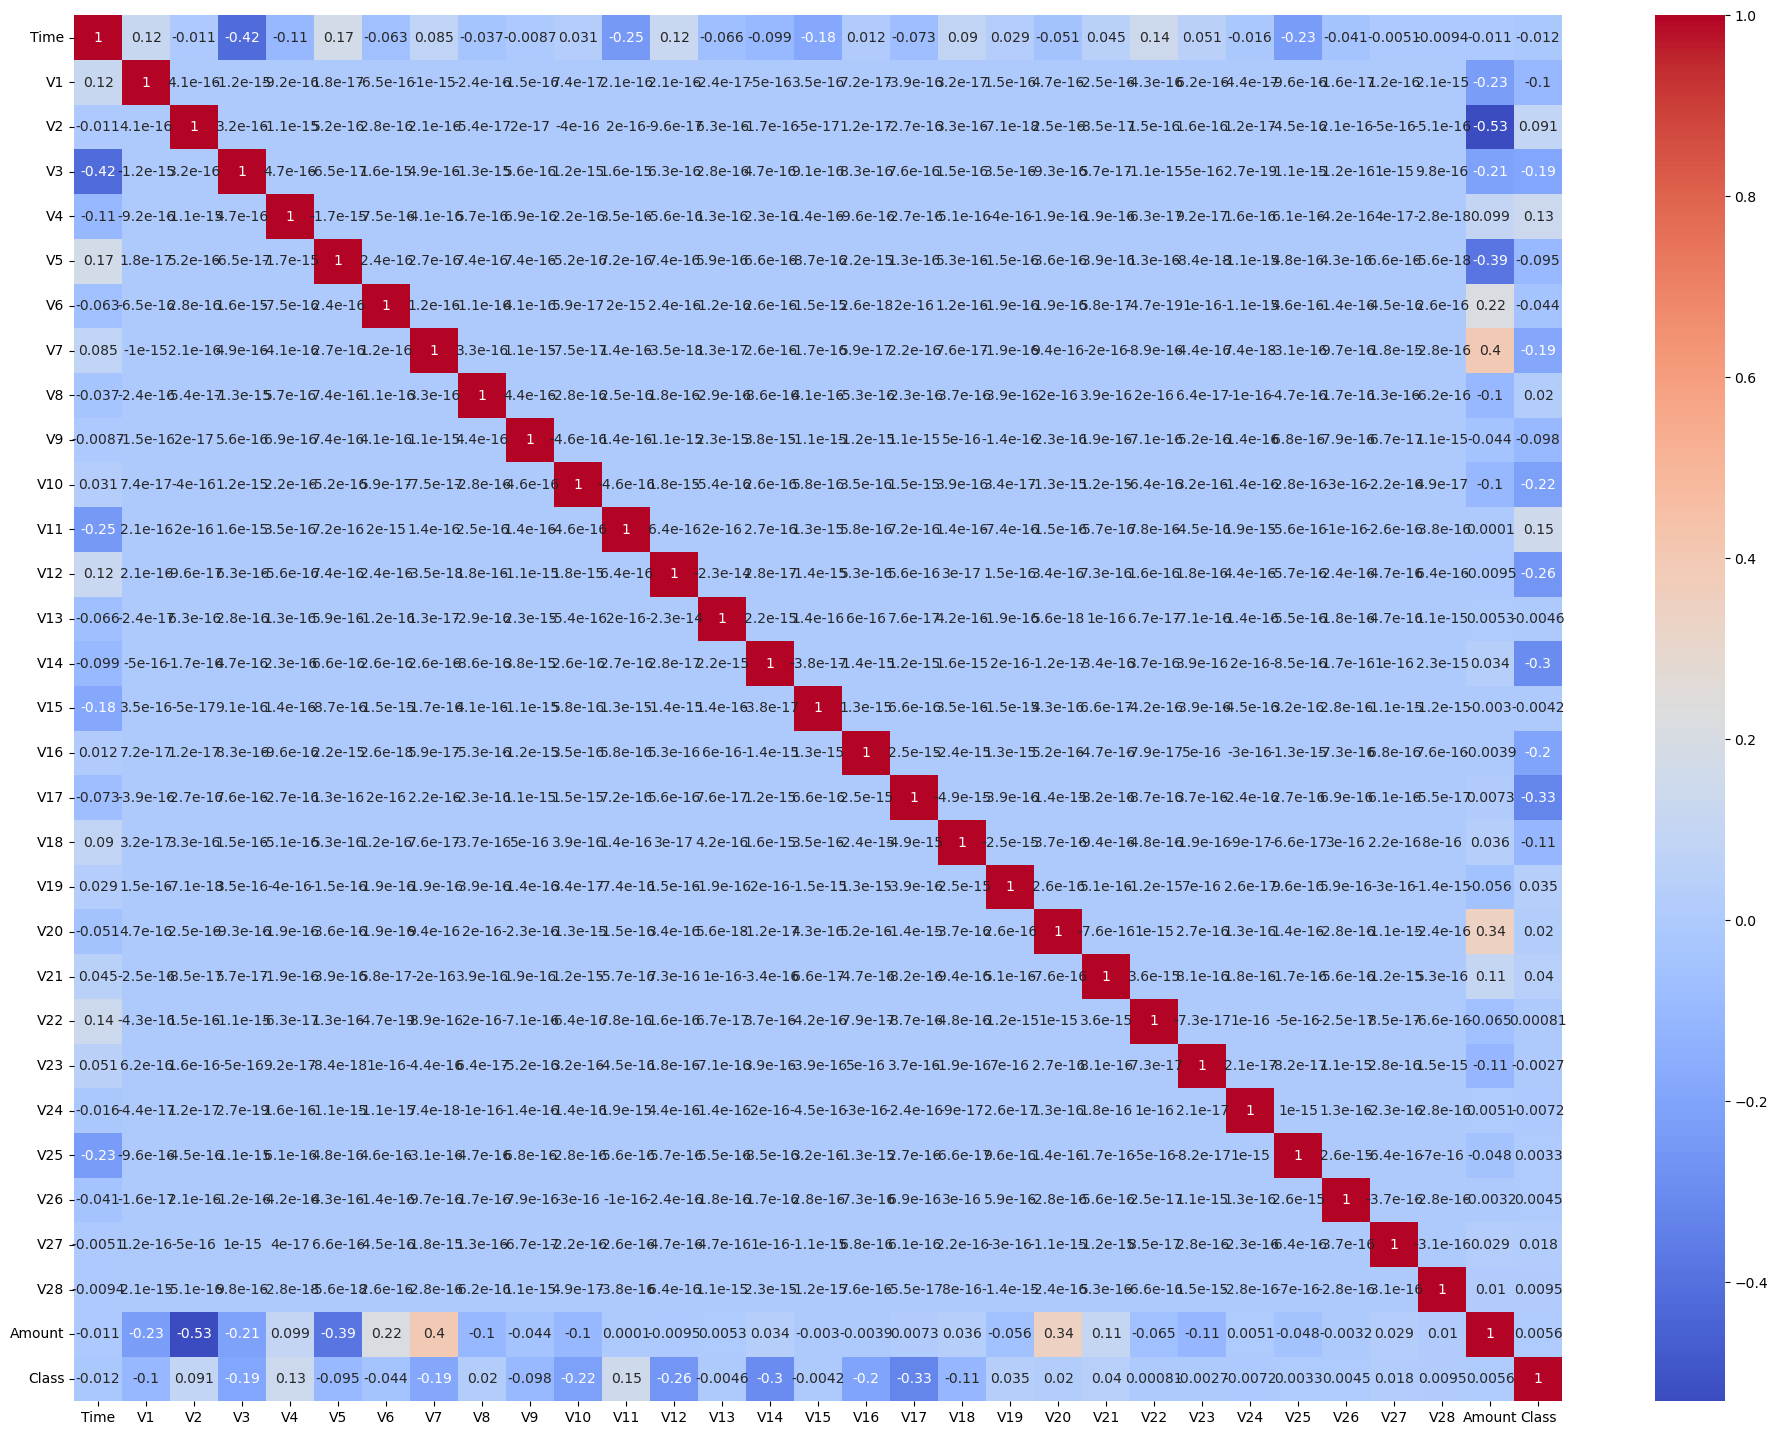

In [11]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

- As per above heat map there is no such multicollinearity between the columns so, no need to remove any columns

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# as given the data provided is of the transaction details over period of two days so,
# Time Column seems to be time at the time of transaction in seconds, that might not be very useful to us
# We have converted Time column to timedelta so, that we can convert the time in seconds to time in hours
# Because analysing time in seconds will not give desired results.
# So we can convert it to hours
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
# We will drop Time,as we have derived the Hour from the time column 
df.drop('Time', axis = 1, inplace= True)

In [14]:
cols = list(enumerate(df.columns.values))

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

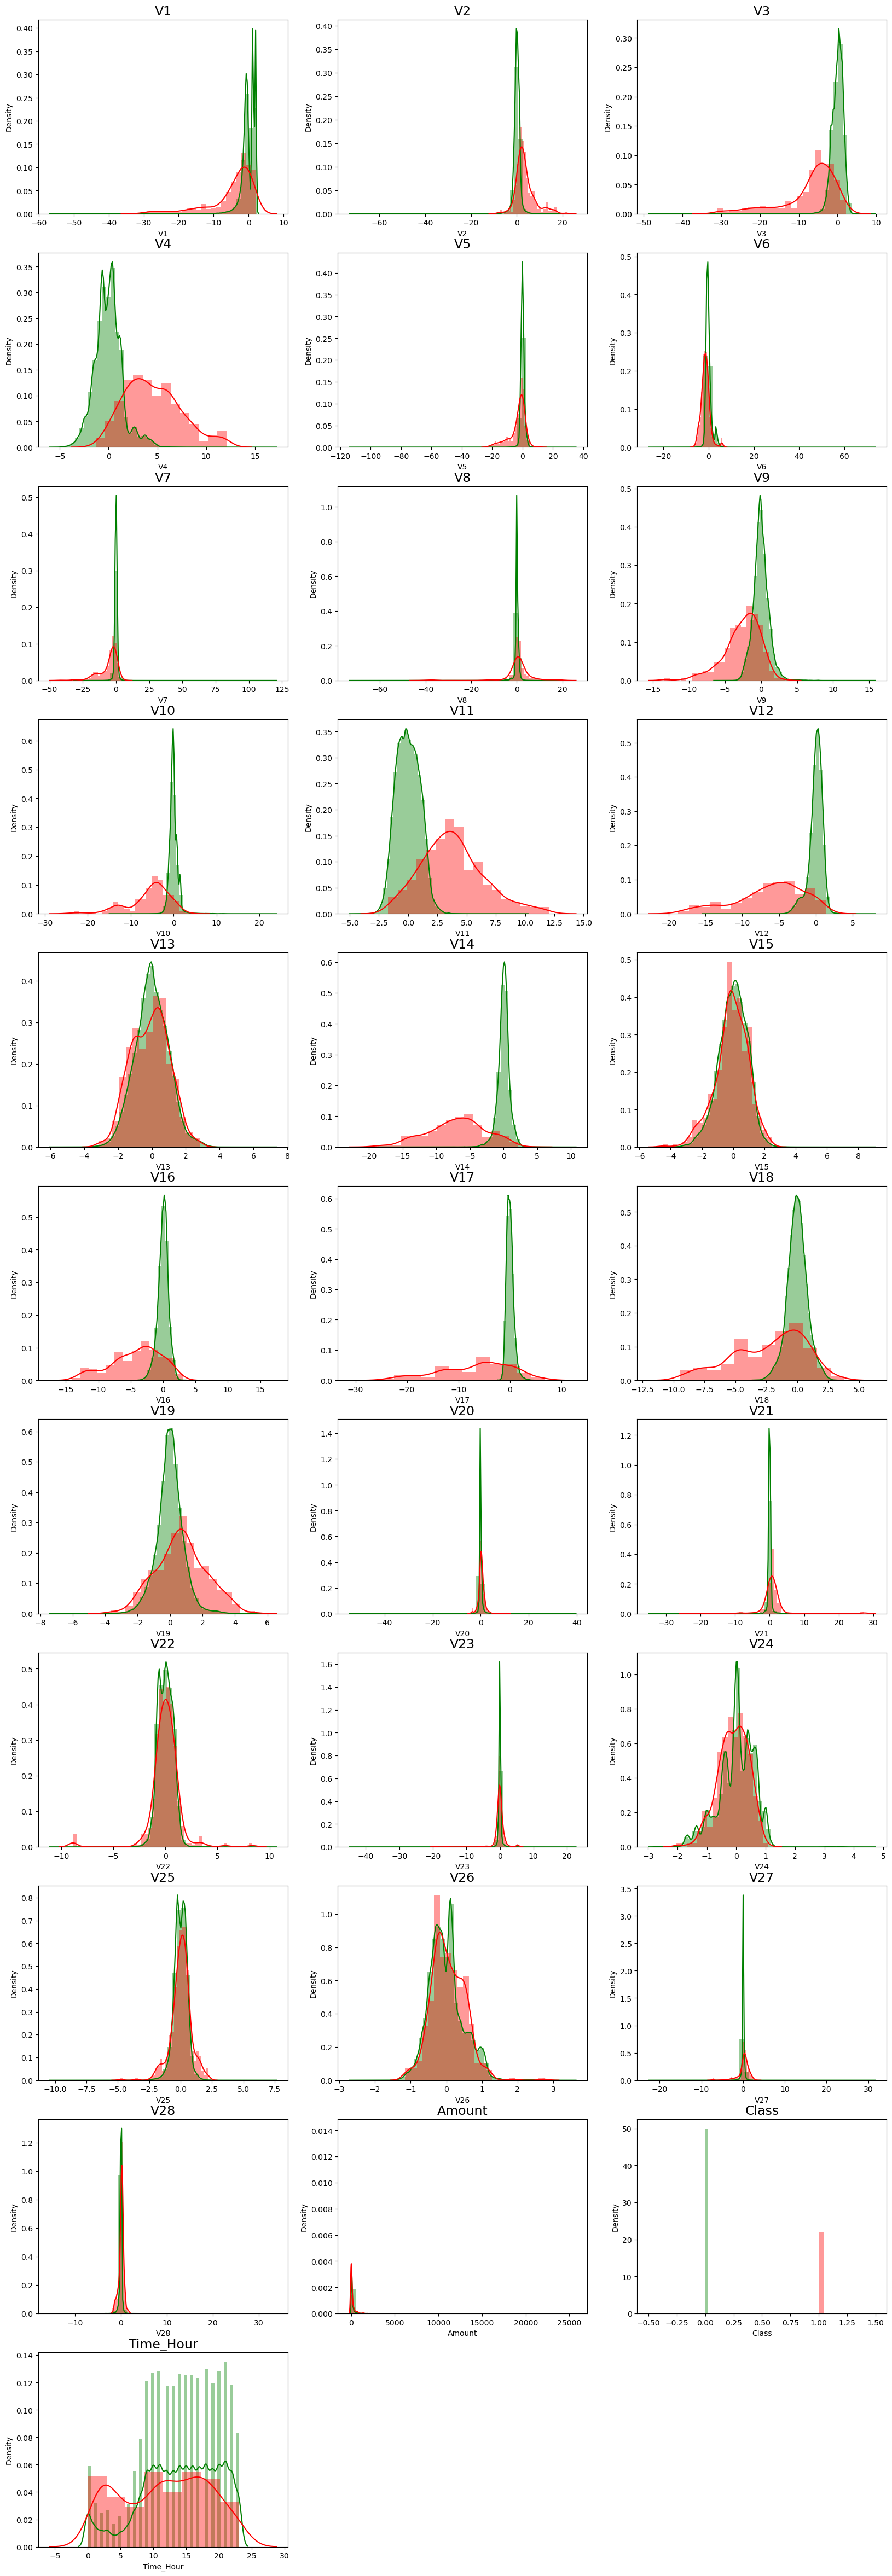

In [15]:
# plot the histogram of a variable from the dataset to see the skewness and difference in the distribution of Fraud and Non-Fraud Transaction
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in cols:
    plt.subplot(11,3,n+1)
    sns.distplot(df[col][normal_records],color = 'green')
    sns.distplot(df[col][fraud_records],color = 'red')
    plt.title(col,fontsize=17)
plt.show()

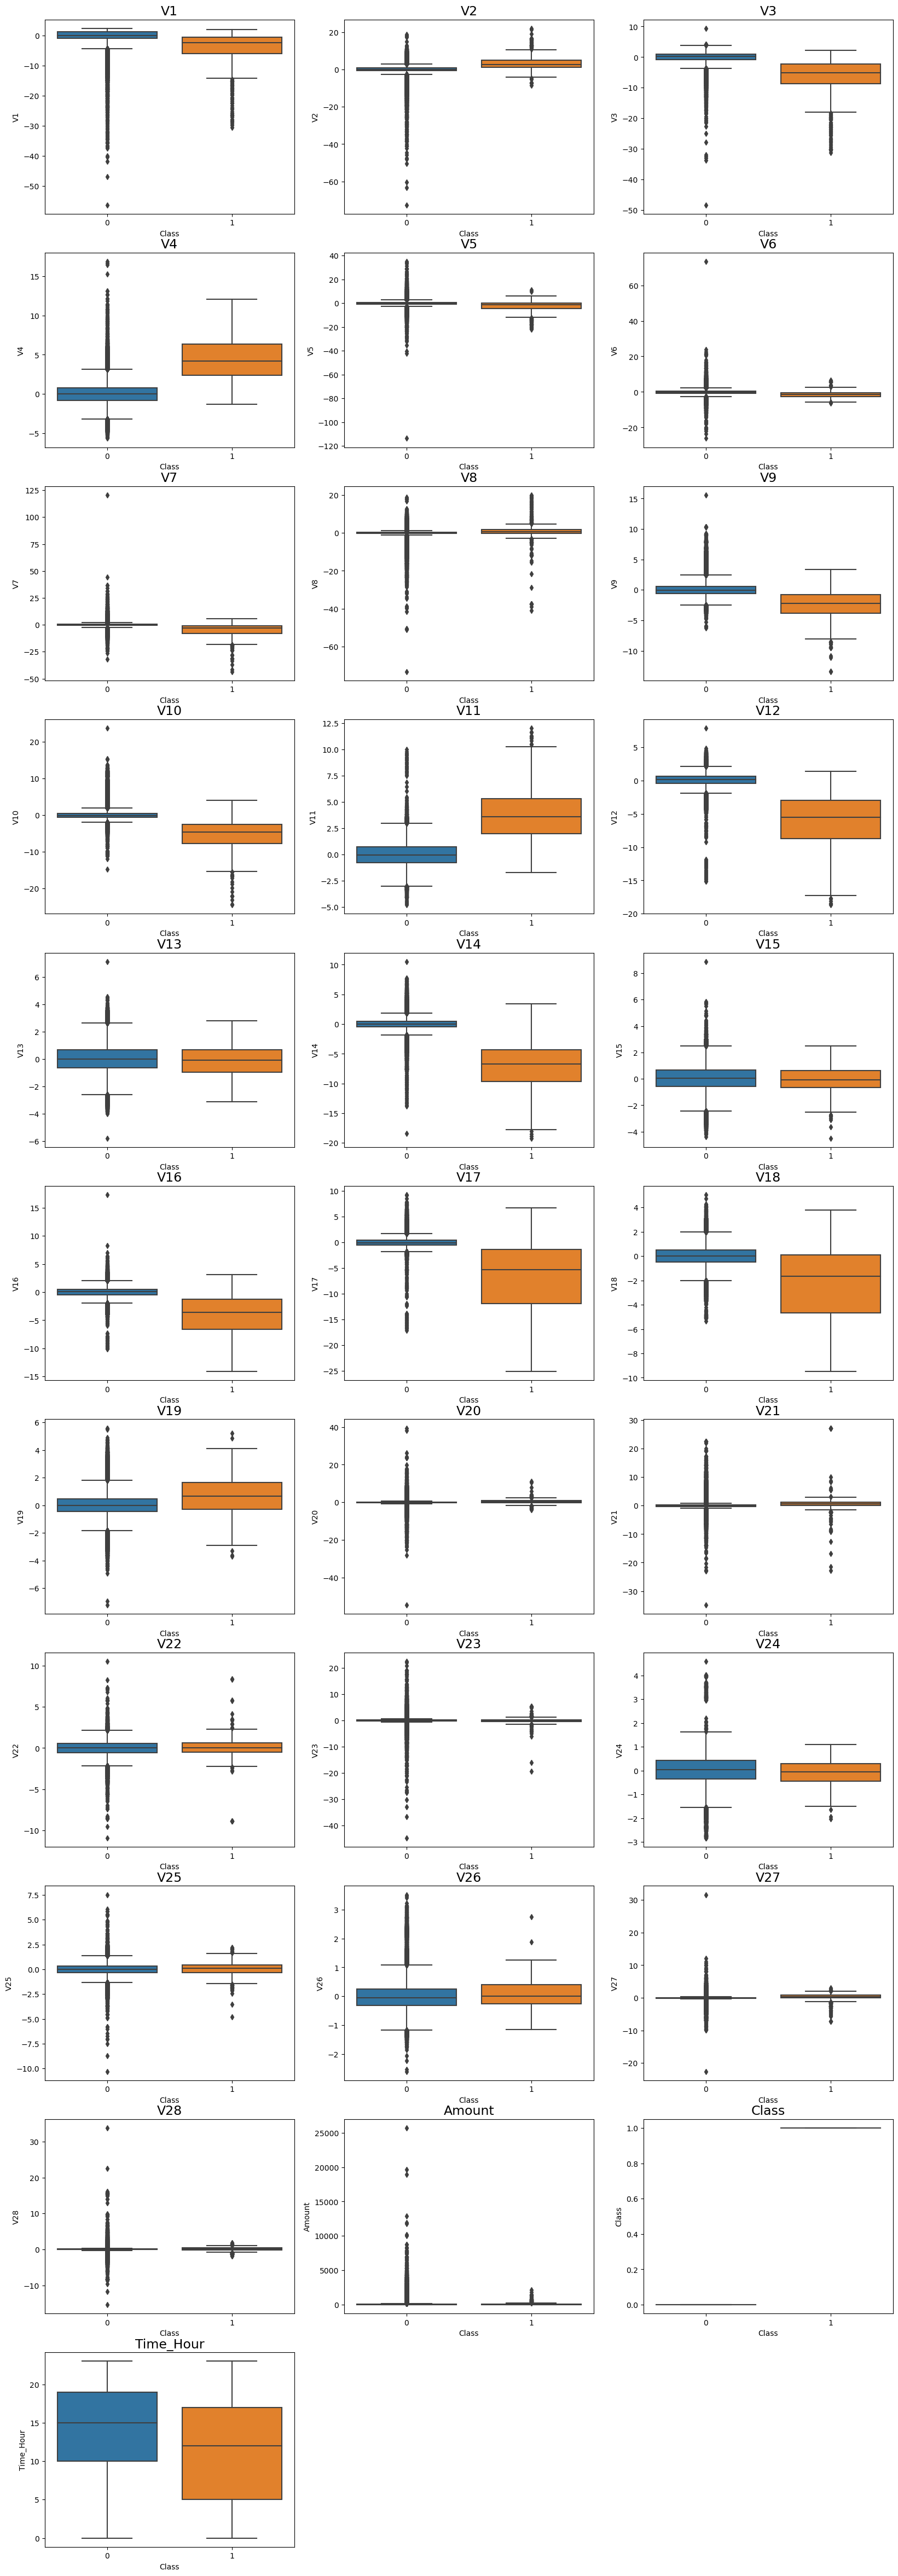

In [16]:
# plot the boxplot of a variable from the dataset to see the skewness

plt.figure(figsize=(20, 60))
for n, col in cols:
    plt.subplot(11,3,n+1)
    sns.boxplot(x='Class', y =col,data = df)
    plt.title(col,fontsize=17)
plt.show()

- AS per the Above **Box Plot** and **Distplot** we are able to infer that, features **V1,V2,V5,V6,V8,V13,V15,V20,V21,V22,V23,V24,V25,V26,V27** are having negligible variation in mean value and distribution of data when compared to **Fraud Transaction Data** and **Non-Fraud Transaction**.


- Whereas for features **V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19** There is clear difference of mean/medain value and distribution of data so, outliers in this features can be considered as **Non-Fraud Transaction**.

In [17]:
continuous_features = list(set(df.columns)-set(['Class']))
continuous_features.sort()


In [18]:
# Now as per box plot we see that for some features have quiet a bit variation in mean for target of 0 and 1 
# But to compare the means of both stage we need perform statistical test.

# Here by we have performed T-test to compare the mean
import scipy.stats as stats

for feature in continuous_features:
    print('---------------------------------')
    print('T-Test for::',feature)
    
    statt,p=stats.ttest_ind(df[feature][df['Class'] == 0],
                    df[feature][df['Class'] == 1])
    
    if p<.05:
        result="Mean value of for both target Condition is different"  
    else:
        result="Mean value of for both target Condition is same"  
    print('--> P-value is',p,"\n-->",result,"\n")
    
    

---------------------------------
T-Test for:: Amount
--> P-value is 0.002651220649191683 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: Time_Hour
--> P-value is 6.786476046015054e-20 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: V1
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: V10
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: V11
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: V12
--> P-value is 0.0 
--> Mean value of for both target Condition is different 

---------------------------------
T-Test for:: V13
--> P-value is 0.014737338961005653 
--> Mean value of for both target Condition is different 

------------------------------

- As per the above result we can say that only features **V22,V23,V25** are having same for **Fraud Transaction** and **Non-Fraud Transaction**.



- **NOTE**- Here important thing to note that here count of both **Fraud Transaction** and **Non-Fraud Transaction** is very imabalanced so these result might not be accurate too we need to perform sampling to get the thing done.

In [19]:
# Here Dataset is very unbalanced as only 0.172% of Data is fradulent so, result obtained may not give the best result if we go
# with the same dataset, so we will just use one of the sampling method so that in the dataset there are equal no of fraud and normal class.

In [20]:
# creating different sets for fraud and legit data
fraud = df[df.Class ==1]
legit = df[df.Class==0]

print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [21]:
# inference of legit amount
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
# inference of fraud amount
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
# here we will simple do under sampling by randomly sampling 492 data from legit data so, that count of legit and fraud equalize
legit_sample = legit.sample(n=492)

In [24]:
# Combining and creating new dataframe with sample dataset and fraud data
new_df = pd.concat([legit_sample,fraud],axis=0)

In [25]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
173167,0.267334,0.057219,0.210804,-1.960467,0.146033,-0.594126,0.378990,-0.089645,-1.325405,0.245271,...,0.052029,-0.012164,-0.410595,-0.427473,-0.474576,0.043409,0.023690,9.95,0,9
38929,1.301596,-0.041721,0.024900,-0.041173,-0.268782,-0.662633,-0.026334,-0.196215,0.257713,-0.132105,...,0.094553,-0.180850,-0.236753,0.496923,1.156743,-0.085689,-0.002060,25.40,0,11
152240,-2.316000,-0.207995,-0.024298,0.648699,2.341564,-0.213354,2.008098,-1.529259,1.253541,1.789225,...,0.668035,0.152189,0.254106,1.192709,0.647110,-1.086973,-0.061417,29.26,0,2
20707,-0.454004,0.813771,1.951157,0.736263,-0.051736,-0.156794,0.530537,0.126330,-0.109584,-0.662932,...,-0.242312,-0.031544,0.369095,-0.086146,-0.576217,0.106708,0.068532,9.00,0,8
211646,1.966428,-0.235736,-0.222266,1.352139,-0.763436,-0.614716,-0.597809,0.034581,1.175672,0.280005,...,0.665702,0.165144,-0.018203,-0.148503,-0.557743,0.046388,-0.034374,1.00,0,14


In [26]:
new_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1,23


In [27]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [28]:
new_df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
Class,,,,,,,,,,,,,,,,,,,,,
0,0.067732,0.050430,0.012243,-0.048999,0.012766,-0.070930,0.038857,-0.040285,0.024837,-0.024866,...,0.007135,0.029009,-0.013142,0.012154,-0.010367,-0.005856,0.006356,-0.012669,80.022012,14.170732
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,11.646341


In [29]:
# Splitting the dataset into X and y
y= new_df['Class']
X = new_df.drop(['Class'], axis=1)

In [30]:
# Checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
173167,0.267334,0.057219,0.210804,-1.960467,0.146033,-0.594126,0.378990,-0.089645,-1.325405,0.245271,...,0.041436,0.052029,-0.012164,-0.410595,-0.427473,-0.474576,0.043409,0.023690,9.95,9
38929,1.301596,-0.041721,0.024900,-0.041173,-0.268782,-0.662633,-0.026334,-0.196215,0.257713,-0.132105,...,0.028476,0.094553,-0.180850,-0.236753,0.496923,1.156743,-0.085689,-0.002060,25.40,11
152240,-2.316000,-0.207995,-0.024298,0.648699,2.341564,-0.213354,2.008098,-1.529259,1.253541,1.789225,...,-0.552541,0.668035,0.152189,0.254106,1.192709,0.647110,-1.086973,-0.061417,29.26,2
20707,-0.454004,0.813771,1.951157,0.736263,-0.051736,-0.156794,0.530537,0.126330,-0.109584,-0.662932,...,-0.138566,-0.242312,-0.031544,0.369095,-0.086146,-0.576217,0.106708,0.068532,9.00,8
211646,1.966428,-0.235736,-0.222266,1.352139,-0.763436,-0.614716,-0.597809,0.034581,1.175672,0.280005,...,0.201629,0.665702,0.165144,-0.018203,-0.148503,-0.557743,0.046388,-0.034374,1.00,14


In [31]:
X.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,23
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,23


In [32]:
# Checking some rows of y
y.head()

173167    0
38929     0
152240    0
20707     0
211646    0
Name: Class, dtype: int64

In [33]:
y.tail()

279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, dtype: int64

In [34]:
# Splitting the dataset using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.30)

In [35]:
# creating a Logistic Regression model and fit with train data and find the accuracy of test and train dataset
model = LogisticRegressionCV(
           penalty='l2'
          ,scoring='roc_auc'
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10)

In [36]:
model.fit(X_train,y_train)

LogisticRegressionCV(max_iter=10000, random_state=42, scoring='roc_auc',
                     solver='newton-cg', tol=10)

Accuracy of Training Data is: 0.9433139534883721
Accuracy of Test Data is: 0.9358108108108109
----------------------------------------
----------------------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       163
           1       1.00      0.86      0.92       133

    accuracy                           0.94       296
   macro avg       0.95      0.93      0.93       296
weighted avg       0.94      0.94      0.94       296

----------------------------------------
----------------------------------------
Confusion Matrix:


C:\Users\Viren\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


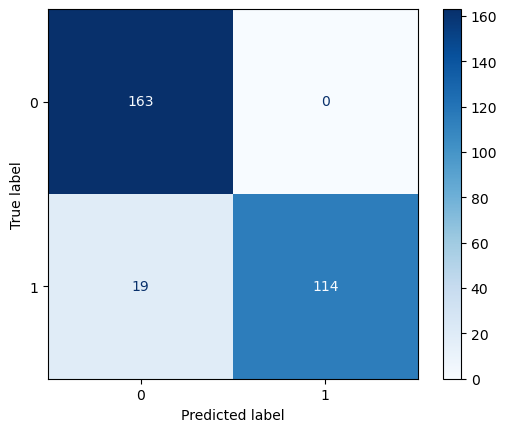

In [37]:
y_pred = model.predict(X_test)
x_train_pred = model.predict(X_train)

Accuracy_train = metrics.accuracy_score(x_train_pred,y_train)
print('Accuracy of Training Data is:',Accuracy_train)

Accuracy_test = metrics.accuracy_score(y_pred,y_test)
print('Accuracy of Test Data is:',Accuracy_test)

print('----------------------------------------')
print('----------------------------------------')
print('classification_report:')

print(classification_report(y_test,y_pred))


print('----------------------------------------')
print('----------------------------------------')
print('Confusion Matrix:')
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues);



# Conclusion

- Accuracy of Train and Test is alomst similar and from **Classification Report** we found **Recall** for Fraud-Transaction is on lower side compared to the Non-Fraud Transaction, which can be improved if we apply better sampling techniques like **SMOTE**


- Overall we can say that model has performed well and we can use this model for further Transaction for predicting Type of Trasaction.


- Also, to reduce the Fraud-Transaction we can focus on **V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19** features and can try to impute the reason that, why these features are affecting transaction fraud and take the action accordingly.